In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
tf.__version__
keras.__version__

'2.12.0'

In [2]:
#Loads fashion mnist from keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
# create validation, train and test set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

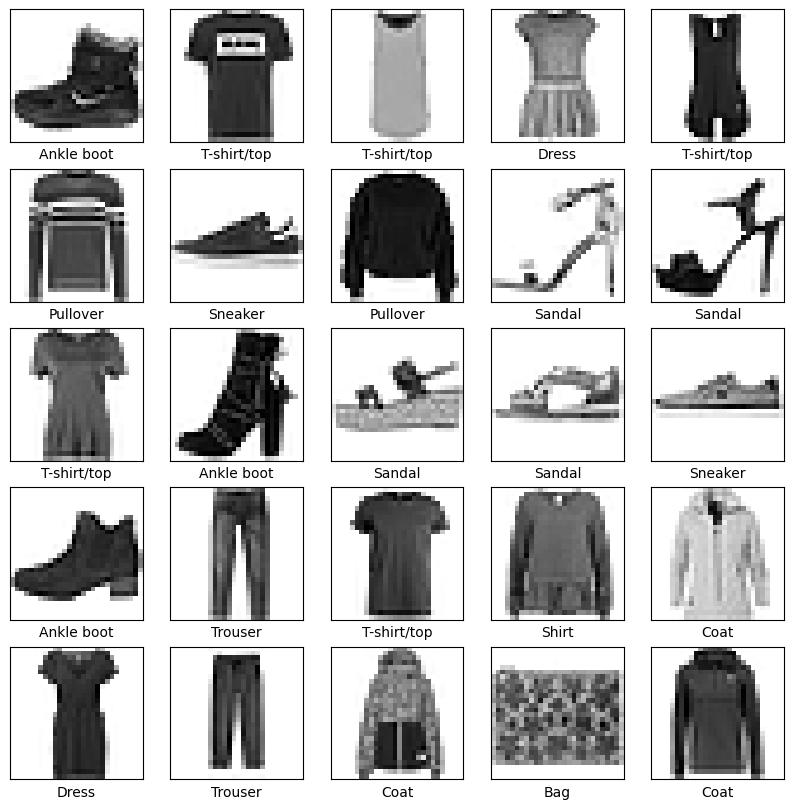

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [ ]:
### Creating the model

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden1 = model.layers[1]

In [12]:
### Accessing any parameter of a given layer, it can be set with set_weights()
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [13]:
biases.shape

(300,)

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7155 - accuracy: 0.7700 - val_loss: 0.5023 - val_accuracy: 0.8352
Epoch 2/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4888 - accuracy: 0.8308 - val_loss: 0.4471 - val_accuracy: 0.8496
Epoch 3/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4442 - accuracy: 0.8451 - val_loss: 0.4205 - val_accuracy: 0.8568
Epoch 4/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4148 - accuracy: 0.8558 - val_loss: 0.4162 - val_accuracy: 0.8570
Epoch 5/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3959 - accuracy: 0.8604 - val_loss: 0.3878 - val_accuracy: 0.8648
Epoch 6/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3793 - accuracy: 0.8674 - val_loss: 0.3948 - val_accuracy: 0.8606
Epoch 7/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3670 - accuracy: 0.8691 - val_loss: 0.3607 - val_ac

1719/1719 [==============================] - 2s 1ms/step - loss: 0.1476 - accuracy: 0.9475 - val_loss: 0.2916 - val_accuracy: 0.9008
Epoch 58/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1460 - accuracy: 0.9477 - val_loss: 0.2993 - val_accuracy: 0.8978
Epoch 59/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1426 - accuracy: 0.9491 - val_loss: 0.3004 - val_accuracy: 0.8986
Epoch 60/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1407 - accuracy: 0.9495 - val_loss: 0.2942 - val_accuracy: 0.9008
Epoch 61/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1389 - accuracy: 0.9508 - val_loss: 0.3736 - val_accuracy: 0.8762
Epoch 62/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1358 - accuracy: 0.9516 - val_loss: 0.3038 - val_accuracy: 0.8974
Epoch 63/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1342 - accuracy: 0.9526 - val_loss: 0.3106 - val_accuracy

1719/1719 [==============================] - 2s 1ms/step - loss: 0.0566 - accuracy: 0.9813 - val_loss: 0.4250 - val_accuracy: 0.8858
Epoch 114/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0559 - accuracy: 0.9815 - val_loss: 0.3819 - val_accuracy: 0.8980
Epoch 115/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0547 - accuracy: 0.9820 - val_loss: 0.3812 - val_accuracy: 0.8992
Epoch 116/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0540 - accuracy: 0.9823 - val_loss: 0.4097 - val_accuracy: 0.8940
Epoch 117/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0528 - accuracy: 0.9828 - val_loss: 0.4731 - val_accuracy: 0.8848
Epoch 118/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0529 - accuracy: 0.9824 - val_loss: 0.4217 - val_accuracy: 0.8898
Epoch 119/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0512 - accuracy: 0.9834 - val_loss: 0.3868 - val_ac

Epoch 169/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.4951 - val_accuracy: 0.8982
Epoch 170/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0162 - accuracy: 0.9962 - val_loss: 0.4892 - val_accuracy: 0.8992
Epoch 171/200
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0141 - accuracy: 0.9972 - val_loss: 0.4838 - val_accuracy: 0.9020
Epoch 172/200
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0150 - accuracy: 0.9965 - val_loss: 0.4966 - val_accuracy: 0.8976
Epoch 173/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0180 - accuracy: 0.9951 - val_loss: 0.5027 - val_accuracy: 0.8990
Epoch 174/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0134 - accuracy: 0.9971 - val_loss: 0.4965 - val_accuracy: 0.9000
Epoch 175/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0

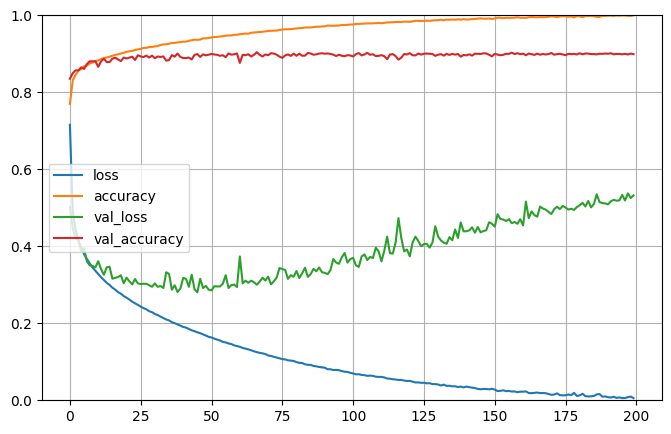

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
### Accuracy and loss values reported are related to the performance of the model on the TRAINING DATA
### During training, the model is optimized to minize the TRAINING LOSS, which is the average value
### of the loss function across all training examples in the current batch. The reported training accuracy
### is the proportion of training examples that were correctly classified by the model

### The validation set is used to evaluete the model`s generalization performance, i.e., how well the model
### can perform on new, unseeen data. The validation loss is the average loss value on the validation set.
### The reported VALIDATION ACCURACY is the proportion of validation examples that were CORRECTLY CLASSIFIED by
### the model

In [21]:
### It is noticeble that both the TRAINING ACCURACY and the VALIDATION ACCURACY steadily increase during training,
### while the TRAINING LOSS and the VALIDATION LOSS decrease. GOOD! Moreover, the VALIDATION CURVES are close
### to the training curves, which means that there is not too much overfitting.

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 627us/step - loss: 0.6091 - accuracy: 0.8910


[0.6090711951255798, 0.890999972820282]

In [26]:
### Using the model to make predictions

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 13ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
y_pred = np.argmax(y_proba, axis=1)
y_pred
np.array(class_names)[y_pred]

### Predicted images classes

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]

array([9, 2, 1], dtype=uint8)

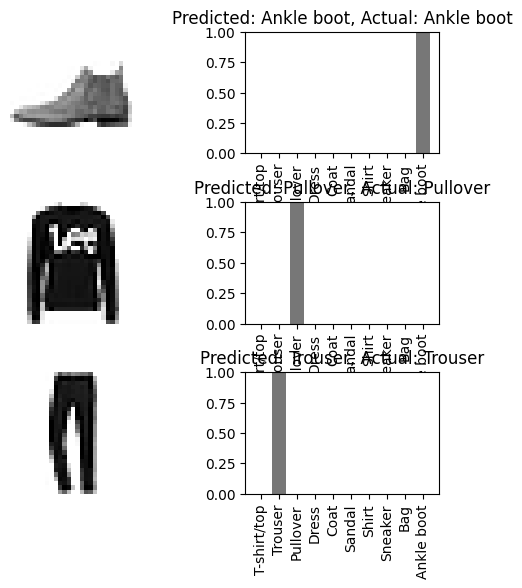

In [45]:
plt.figure(figsize=(6, 6))
for i in range(3):
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(X_new[i], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.subplot(3, 2, 2*i+2)
    plt.bar(range(10), y_proba[i], color="#777777")
    plt.ylim([0, 1])
    plt.xticks(range(10), class_names, rotation=90)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.title(f"Predicted: {class_names[y_pred[i]]}, Actual: {class_names[y_new[i]]}")
plt.show()